In [ ]:
#import pacages
import pandas as pd
import numpy as np
import json

In [ ]:
from sklearn.dummy import DummyClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
with open('/content/drive/MyDrive/BTT/abcd_v1.json', 'r') as f:
  data = json.load(f)
#df = pd.DataFrame(data)

In [ ]:
# training data
df_train = pd.DataFrame(data['train'])

In [ ]:
df_train.head()

,convo_id,scenario,original,delexed
0,3592,"{'personal': {'customer_name': 'crystal minh',...","[[agent, Hi!], [agent, How can I help you?], [...","[{'speaker': 'agent', 'text': 'hi!', 'turn_cou..."
1,9489,{'personal': {'customer_name': 'alessandro pho...,"[[agent, good afternoon, how can I help you?],...","[{'speaker': 'agent', 'text': 'good afternoon,..."
2,3695,"{'personal': {'customer_name': 'joyce wu', 'me...","[[customer, HEY HO!], [agent, good afternoon, ...","[{'speaker': 'customer', 'text': 'hey ho!', 't..."
3,5798,"{'personal': {'account_id': 'xjiw8ufp3b', 'cus...","[[agent, Welcome to AcmeBrands! How can I help...","[{'speaker': 'agent', 'text': 'welcome to acme..."
4,3647,{'personal': {'customer_name': 'norman bouchar...,"[[agent, Hello, how can i help you], [customer...","[{'speaker': 'agent', 'text': 'hello, how can ..."


In [ ]:
df_train.shape

(8034, 4)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8034 entries, 0 to 8033
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   convo_id  8034 non-null   int64 
 1   scenario  8034 non-null   object
 2   original  8034 non-null   object
 3   delexed   8034 non-null   object
dtypes: int64(1), object(3)
memory usage: 251.2+ KB


In [ ]:
df_train['scenario'][0]

{'personal': {'customer_name': 'crystal minh',
  'email': 'cminh730@email.com',
  'member_level': 'bronze',
  'phone': '(977) 625-2661',
  'username': 'cminh730'},
 'order': {'street_address': '6821 1st ave',
  'full_address': '6821 1st ave  san mateo, ny 75227',
  'city': 'san mateo',
  'num_products': '1',
  'order_id': '3348917502',
  'packaging': 'yes',
  'payment_method': 'credit card',
  'products': "[{'brand': 'michael_kors', 'product_type': 'jeans', 'amount': 94, 'image_url': 'images/michael_kors-jeans.jpeg'}]",
  'purchase_date': '2019-11-06',
  'state': 'ny',
  'zip_code': '75227'},
 'product': {'names': ['michael_kors jeans'], 'amounts': [94]},
 'flow': 'product_defect',
 'subflow': 'return_size'}

In [ ]:
#separate out subflows given in the scenario data
subflow_list = []
for i in range(0,df_train.shape[0]):
  subflow_list.append(df_train['scenario'][i]['subflow'])

In [ ]:
subflow_list

['return_size',
 'refund_status',
 'timing_4',
 'manage',
 'pricing_3',
 'manage_extension',
 'recover_username',
 'shopping_cart',
 'manage',
 'status',
 'jacket_how_2',
 'credit_card',
 'status',
 'timing_2',
 'slow_speed',
 'status_quantity',
 'mistimed_billing_already_returned',
 'jeans_how_4',
 'status_due_date',
 'return_size',
 'recover_password',
 'recover_password',
 'recover_username',
 'manage_extension',
 'pricing_1',
 'manage_pay_bill',
 'jeans_how_1',
 'status_payment_method',
 'refund_update',
 'policy_2',
 'pricing_2',
 'credit_card',
 'membership_2',
 'search_results',
 'refund_status',
 'timing_3',
 'refund_initiate',
 'return_color',
 'missing',
 'return_color',
 'timing_4',
 'out_of_stock_general',
 'status_questions',
 'recover_username',
 'recover_username',
 'recover_username',
 'refund_status',
 'shirt_other_2',
 'reset_2fa',
 'manage',
 'bad_price_competitor',
 'reset_2fa',
 'jeans_how_2',
 'recover_username',
 'status_quantity',
 'return_color',
 'refund_updat

In [ ]:
df_train['subflow'] = subflow_list

In [ ]:
df_train.head()

,convo_id,scenario,original,delexed,subflow
0,3592,"{'personal': {'customer_name': 'crystal minh',...","[[agent, Hi!], [agent, How can I help you?], [...","[{'speaker': 'agent', 'text': 'hi!', 'turn_cou...",return_size
1,9489,{'personal': {'customer_name': 'alessandro pho...,"[[agent, good afternoon, how can I help you?],...","[{'speaker': 'agent', 'text': 'good afternoon,...",refund_status
2,3695,"{'personal': {'customer_name': 'joyce wu', 'me...","[[customer, HEY HO!], [agent, good afternoon, ...","[{'speaker': 'customer', 'text': 'hey ho!', 't...",timing_4
3,5798,"{'personal': {'account_id': 'xjiw8ufp3b', 'cus...","[[agent, Welcome to AcmeBrands! How can I help...","[{'speaker': 'agent', 'text': 'welcome to acme...",manage
4,3647,{'personal': {'customer_name': 'norman bouchar...,"[[agent, Hello, how can i help you], [customer...","[{'speaker': 'agent', 'text': 'hello, how can ...",pricing_3


In [ ]:
#total unique subflows identified in data
unique_subflows = df_train['subflow'].unique()
print(unique_subflows)

unique_subflows_count = len(unique_subflows)
print('\nunique subflows count :',unique_subflows_count)

['return_size' 'refund_status' 'timing_4' 'manage' 'pricing_3'
 'manage_extension' 'recover_username' 'shopping_cart' 'status'
 'jacket_how_2' 'credit_card' 'timing_2' 'slow_speed' 'status_quantity'
 'mistimed_billing_already_returned' 'jeans_how_4' 'status_due_date'
 'recover_password' 'pricing_1' 'manage_pay_bill' 'jeans_how_1'
 'status_payment_method' 'refund_update' 'policy_2' 'pricing_2'
 'membership_2' 'search_results' 'timing_3' 'refund_initiate'
 'return_color' 'missing' 'out_of_stock_general' 'status_questions'
 'shirt_other_2' 'reset_2fa' 'bad_price_competitor' 'jeans_how_2'
 'status_mystery_fee' 'status_credit_missing' 'status_shipping_question'
 'manage_downgrade' 'cost' 'membership_3' 'jeans_other_2'
 'manage_change_phone' 'jacket_other_3' 'mistimed_billing_never_bought'
 'status_delivery_time' 'status_due_amount' 'out_of_stock_one_item'
 'jeans_other_3' 'manage_create' 'policy_1' 'policy_3'
 'manage_dispute_bill' 'status_service_added' 'manage_cancel'
 'return_stain' 'bad

In [ ]:
#separate out main workflows given in the scenario data
flow_list = []
for i in range(0,df_train.shape[0]):
  flow_list.append(df_train['scenario'][i]['flow'])

In [ ]:
#flow_list

In [ ]:
df_train['main_workflows'] = flow_list

In [ ]:
#total unique main workflows identified in data
unique_main_workflows = df_train['main_workflows'].unique()
print(unique_main_workflows)

unique_main_workflows_count = len(unique_main_workflows)
print('\nunique main workflows count :',unique_main_workflows_count)

['product_defect' 'storewide_query' 'shipping_issue'
 'subscription_inquiry' 'account_access' 'troubleshoot_site'
 'single_item_query' 'order_issue' 'purchase_dispute' 'manage_account']

unique main workflows count : 10


In [ ]:
#test data
df_test= pd.DataFrame(data['test'])

In [ ]:
df_test.head()

,convo_id,scenario,original,delexed
0,4989,"{'personal': {'customer_name': 'chloe zhang', ...","[[agent, Hello. How can i help you today?], [c...","[{'speaker': 'agent', 'text': 'hello. how can ..."
1,4512,"{'personal': {'account_id': 'u85alflg2z', 'cus...","[[agent, Hi! How may I help you?], [customer, ...","[{'speaker': 'agent', 'text': 'hi! how may i h..."
2,5063,"{'personal': {'customer_name': 'chloe zhang', ...","[[agent, Hello! How can I help you today?], [c...","[{'speaker': 'agent', 'text': 'hello! how can ..."
3,1694,"{'personal': {'customer_name': 'chloe zhang', ...","[[agent, Hello, thank you for contacting us to...","[{'speaker': 'agent', 'text': 'hello, thank yo..."
4,8068,{'personal': {'customer_name': 'rodriguez domi...,"[[agent, Hello, thank you for contacting AcmeC...","[{'speaker': 'agent', 'text': 'hello, thank yo..."


In [ ]:
df_test['scenario'][0]

{'personal': {'customer_name': 'chloe zhang',
  'member_level': 'gold',
  'phone': '(741) 062-3341'},
 'order': {'street_address': '4247 lincoln ave',
  'full_address': '4247 lincoln ave  newark, ca 82636',
  'city': 'newark',
  'state': 'ca',
  'zip_code': '82636'},
 'product': {'names': [], 'amounts': []},
 'flow': 'storewide_query',
 'subflow': 'timing_4'}

In [ ]:
#null values
print(df_train.isna().sum())

convo_id          0
scenario          0
original          0
delexed           0
subflow           0
main_workflows    0
dtype: int64


In [ ]:
#null values
print(df_test.isna().sum())

convo_id    0
scenario    0
original    0
delexed     0
dtype: int64


In [ ]:
#separate out subflows given in the scenario data on test data
subflow_list_test = []
for i in range(0,df_test.shape[0]):
  subflow_list_test.append(df_test['scenario'][i]['subflow'])

In [ ]:
#subflow_list_test

In [ ]:
df_test['subflow'] = subflow_list_test

In [ ]:
#total unique subflows identified in test data
unique_subflows_test = df_test['subflow'].unique()
print(unique_subflows_test)

unique_subflows_test_count = len(unique_subflows_test)
print('\nunique subflows count in test data :',unique_subflows_test_count)

['timing_4' 'manage_dispute_bill' 'shirt_how_3' 'policy_3' 'credit_card'
 'policy_2' 'promo_code_invalid' 'reset_2fa' 'boots_other_3' 'status'
 'status_due_amount' 'search_results' 'status_due_date' 'recover_password'
 'shopping_cart' 'manage_upgrade' 'status_service_added'
 'manage_change_phone' 'mistimed_billing_already_returned'
 'bad_price_yesterday' 'return_size' 'cost' 'boots_other_4'
 'out_of_stock_general' 'jeans_other_2' 'timing_2' 'slow_speed'
 'manage_create' 'membership_1' 'shirt_how_2'
 'mistimed_billing_never_bought' 'jacket_other_3' 'pricing_3' 'missing'
 'shirt_how_1' 'recover_username' 'jacket_other_4' 'out_of_stock_one_item'
 'refund_initiate' 'status_questions' 'status_delivery_time'
 'bad_price_competitor' 'timing_1' 'status_payment_method'
 'manage_pay_bill' 'shirt_other_2' 'refund_update' 'return_color'
 'membership_3' 'jacket_other_2' 'jeans_other_1' 'shirt_how_4'
 'status_shipping_question' 'return_stain' 'pricing_4' 'manage'
 'promo_code_out_of_date' 'pricing_2

In [ ]:
#separate out subflows given in the scenario data on test data
mainflow_list_test = []
for i in range(0,df_test.shape[0]):
  mainflow_list_test.append(df_test['scenario'][i]['flow'])

In [ ]:
#mainflow_list_test

In [ ]:
df_test['mainflow'] = mainflow_list_test

In [ ]:
#total unique main workflows identified in data
unique_main_workflows_test = df_test['mainflow'].unique()
print(unique_main_workflows_test)

unique_main_workflows_test_count = len(unique_main_workflows_test)
print('\nunique main workflows count in test data:',unique_main_workflows_test_count)

['storewide_query' 'subscription_inquiry' 'single_item_query'
 'troubleshoot_site' 'purchase_dispute' 'account_access' 'shipping_issue'
 'order_issue' 'manage_account' 'product_defect']

unique main workflows count in test data: 10


In [ ]:
df_test.head()

,convo_id,scenario,original,delexed,subflow,mainflow
0,4989,"{'personal': {'customer_name': 'chloe zhang', ...","[[agent, Hello. How can i help you today?], [c...","[{'speaker': 'agent', 'text': 'hello. how can ...",timing_4,storewide_query
1,4512,"{'personal': {'account_id': 'u85alflg2z', 'cus...","[[agent, Hi! How may I help you?], [customer, ...","[{'speaker': 'agent', 'text': 'hi! how may i h...",manage_dispute_bill,subscription_inquiry
2,5063,"{'personal': {'customer_name': 'chloe zhang', ...","[[agent, Hello! How can I help you today?], [c...","[{'speaker': 'agent', 'text': 'hello! how can ...",shirt_how_3,single_item_query
3,1694,"{'personal': {'customer_name': 'chloe zhang', ...","[[agent, Hello, thank you for contacting us to...","[{'speaker': 'agent', 'text': 'hello, thank yo...",policy_3,storewide_query
4,8068,{'personal': {'customer_name': 'rodriguez domi...,"[[agent, Hello, thank you for contacting AcmeC...","[{'speaker': 'agent', 'text': 'hello, thank yo...",credit_card,troubleshoot_site


In [ ]:
#TFIDF vectorizor
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#for X in df_train['original']:
# deleting column element of row
df_train['original_copy'] = df_train['original']


In [ ]:
df_train.head()

,convo_id,scenario,original,delexed,subflow,main_workflows,original_copy
0,3592,"{'personal': {'customer_name': 'crystal minh',...","[[agent, Hi!], [agent, How can I help you?], [...","[{'speaker': 'agent', 'text': 'hi!', 'turn_cou...",return_size,product_defect,"[[agent, Hi!], [agent, How can I help you?], [..."
1,9489,{'personal': {'customer_name': 'alessandro pho...,"[[agent, good afternoon, how can I help you?],...","[{'speaker': 'agent', 'text': 'good afternoon,...",refund_status,product_defect,"[[agent, good afternoon, how can I help you?],..."
2,3695,"{'personal': {'customer_name': 'joyce wu', 'me...","[[customer, HEY HO!], [agent, good afternoon, ...","[{'speaker': 'customer', 'text': 'hey ho!', 't...",timing_4,storewide_query,"[[customer, HEY HO!], [agent, good afternoon, ..."
3,5798,"{'personal': {'account_id': 'xjiw8ufp3b', 'cus...","[[agent, Welcome to AcmeBrands! How can I help...","[{'speaker': 'agent', 'text': 'welcome to acme...",manage,shipping_issue,"[[agent, Welcome to AcmeBrands! How can I help..."
4,3647,{'personal': {'customer_name': 'norman bouchar...,"[[agent, Hello, how can i help you], [customer...","[{'speaker': 'agent', 'text': 'hello, how can ...",pricing_3,storewide_query,"[[agent, Hello, how can i help you], [customer..."


In [ ]:
df_train['original_copy']= df_train['original'].apply(lambda xs: [' '.join(x) for x in xs])

In [ ]:
df_train.head()

,convo_id,scenario,original,delexed,subflow,main_workflows,original_copy
0,3592,"{'personal': {'customer_name': 'crystal minh',...","[[agent, Hi!], [agent, How can I help you?], [...","[{'speaker': 'agent', 'text': 'hi!', 'turn_cou...",return_size,product_defect,"[[agent, Hi!], [agent, How can I help you?], [..."
1,9489,{'personal': {'customer_name': 'alessandro pho...,"[[agent, good afternoon, how can I help you?],...","[{'speaker': 'agent', 'text': 'good afternoon,...",refund_status,product_defect,"[[agent, good afternoon, how can I help you?],..."
2,3695,"{'personal': {'customer_name': 'joyce wu', 'me...","[[customer, HEY HO!], [agent, good afternoon, ...","[{'speaker': 'customer', 'text': 'hey ho!', 't...",timing_4,storewide_query,"[[customer, HEY HO!], [agent, good afternoon, ..."
3,5798,"{'personal': {'account_id': 'xjiw8ufp3b', 'cus...","[[agent, Welcome to AcmeBrands! How can I help...","[{'speaker': 'agent', 'text': 'welcome to acme...",manage,shipping_issue,"[[agent, Welcome to AcmeBrands! How can I help..."
4,3647,{'personal': {'customer_name': 'norman bouchar...,"[[agent, Hello, how can i help you], [customer...","[{'speaker': 'agent', 'text': 'hello, how can ...",pricing_3,storewide_query,"[[agent, Hello, how can i help you], [customer..."


In [ ]:
df_train['original_copy']= [','.join(map(str, l)) for l in df_train['original_copy']]
df_train.head()

,convo_id,scenario,original,delexed,subflow,main_workflows,original_copy
0,3592,"{'personal': {'customer_name': 'crystal minh',...","[[agent, Hi!], [agent, How can I help you?], [...","[{'speaker': 'agent', 'text': 'hi!', 'turn_cou...",return_size,product_defect,"['agent', 'Hi!'],['agent', 'How can I help you..."
1,9489,{'personal': {'customer_name': 'alessandro pho...,"[[agent, good afternoon, how can I help you?],...","[{'speaker': 'agent', 'text': 'good afternoon,...",refund_status,product_defect,"['agent', 'good afternoon, how can I help you?..."
2,3695,"{'personal': {'customer_name': 'joyce wu', 'me...","[[customer, HEY HO!], [agent, good afternoon, ...","[{'speaker': 'customer', 'text': 'hey ho!', 't...",timing_4,storewide_query,"['customer', 'HEY HO!'],['agent', 'good aftern..."
3,5798,"{'personal': {'account_id': 'xjiw8ufp3b', 'cus...","[[agent, Welcome to AcmeBrands! How can I help...","[{'speaker': 'agent', 'text': 'welcome to acme...",manage,shipping_issue,"['agent', 'Welcome to AcmeBrands! How can I he..."
4,3647,{'personal': {'customer_name': 'norman bouchar...,"[[agent, Hello, how can i help you], [customer...","[{'speaker': 'agent', 'text': 'hello, how can ...",pricing_3,storewide_query,"['agent', 'Hello, how can i help you'],['custo..."


In [ ]:
####### Convert test data 'original' column to string objects

In [ ]:
df_test['original_copy']= df_test['original'].apply(lambda xs: [' '.join(x) for x in xs])

In [ ]:
df_test['original_copy']= [','.join(map(str, l)) for l in df_test['original_copy']]
df_test.head()

,convo_id,scenario,original,delexed,subflow,mainflow,original_copy
0,4989,"{'personal': {'customer_name': 'chloe zhang', ...","[[agent, Hello. How can i help you today?], [c...","[{'speaker': 'agent', 'text': 'hello. how can ...",timing_4,storewide_query,"agent Hello. How can i help you today?,custome..."
1,4512,"{'personal': {'account_id': 'u85alflg2z', 'cus...","[[agent, Hi! How may I help you?], [customer, ...","[{'speaker': 'agent', 'text': 'hi! how may i h...",manage_dispute_bill,subscription_inquiry,"agent Hi! How may I help you?,customer Hello. ..."
2,5063,"{'personal': {'customer_name': 'chloe zhang', ...","[[agent, Hello! How can I help you today?], [c...","[{'speaker': 'agent', 'text': 'hello! how can ...",shirt_how_3,single_item_query,"agent Hello! How can I help you today?,custome..."
3,1694,"{'personal': {'customer_name': 'chloe zhang', ...","[[agent, Hello, thank you for contacting us to...","[{'speaker': 'agent', 'text': 'hello, thank yo...",policy_3,storewide_query,"agent Hello, thank you for contacting us today..."
4,8068,{'personal': {'customer_name': 'rodriguez domi...,"[[agent, Hello, thank you for contacting AcmeC...","[{'speaker': 'agent', 'text': 'hello, thank yo...",credit_card,troubleshoot_site,"agent Hello, thank you for contacting AcmeCorp..."


In [ ]:
X = df_train['original_copy']
Y = df_train['subflow']

In [ ]:
X_test = df_test['original_copy']

In [ ]:
Y_test = df_test['subflow']

In [ ]:
# 1. Create a TfidfVectorizer oject
tfidf_vectorizer = TfidfVectorizer()

# 2. Fit the vectorizer to X_train
tfidf_vectorizer.fit(X)

# 3. Transform *both* the training and test data using the fitted vectorizer and its 'transform' attribute
X_train_tfidf = tfidf_vectorizer.transform(X)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print(X_train_tfidf)

  (0, 20690)	0.07103076075584479
  (0, 20681)	0.08079307191061326
  (0, 20427)	0.053430545302542334
  (0, 20405)	0.030589956158505717
  (0, 20312)	0.038190396062033886
  (0, 20273)	0.026870831267755236
  (0, 20219)	0.051675739495263516
  (0, 20152)	0.037045234446562096
  (0, 20103)	0.024647744604701517
  (0, 19867)	0.039888792655398596
  (0, 19784)	0.06755822120234456
  (0, 19729)	0.020643799886820673
  (0, 19661)	0.06275201844734621
  (0, 19477)	0.05104055232490282
  (0, 19314)	0.06701882892767377
  (0, 19185)	0.04937998476633805
  (0, 19178)	0.021175682796182954
  (0, 19172)	0.053841433005216585
  (0, 19163)	0.11779536770589623
  (0, 19151)	0.03479076210318727
  (0, 19137)	0.07590243519450734
  (0, 19126)	0.06387496408285513
  (0, 19021)	0.055902934025536574
  (0, 18911)	0.03166324674030346
  (0, 18549)	0.03596594821980889
  :	:
  (8033, 12395)	0.14769160129388414
  (8033, 12386)	0.07995582911638541
  (8033, 12054)	0.12429256630773487
  (8033, 11878)	0.02978661787465683
  (8033, 1148

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [ ]:
# 1. Create a LogisticRegression model object, and fit a Logistic Regression model to the transformed training data
model = LogisticRegression(max_iter=200)
model.fit(X_train_tfidf, Y)

# 2. Make predictions on the transformed test data using the predict_proba() method and 
# save the values of the second column
probability_predictions = model.predict_proba(X_test_tfidf)[:,1]

# 3. Make predictions on the transformed test data using the predict() method 
class_label_predictions = model.predict(X_test_tfidf)

# 4. Compute the Area Under the ROC curve (AUC) for the test data. Note that this time we are using one 
# function 'roc_auc_score()' to compute the auc rather than using both 'roc_curve()' and 'auc()' as we have 
# done in the past
auc = roc_auc_score(Y_test, probability_predictions)
print('AUC on the test data: {:.4f}'.format(auc))

ValueError: ignored

In [ ]:
#### Data understanding & visualization

In [ ]:
mainflow_list = {}
# for i in range(0,df_train.shape[0]):
#   subflow_list.append(df_train['scenario'][i]['subflow'])

for i in range(0, df_train.shape[0]):
  if df_train['scenario'][i]['flow'] not in mainflow_list:
    mainflow_list[df_train['scenario'][i]['flow']] = 1;
  else:
     mainflow_list[df_train['scenario'][i]['flow']] += 1;


print(mainflow_list)

{'product_defect': 863, 'storewide_query': 872, 'shipping_issue': 814, 'subscription_inquiry': 718, 'account_access': 847, 'troubleshoot_site': 819, 'single_item_query': 840, 'order_issue': 831, 'purchase_dispute': 858, 'manage_account': 572}


In [ ]:
print(len(mainflow_list))

10


In [ ]:
max_value = max(mainflow_list, key=mainflow_list.get)
print(max_value, " : ", mainflow_list[max_value])

storewide_query  :  872


In [ ]:
subflow_list = {}

for i in range(0, df_train.shape[0]):
  if df_train['scenario'][i]['subflow'] not in subflow_list:
    subflow_list[df_train['scenario'][i]['subflow']] = 1;
  else:
     subflow_list[df_train['scenario'][i]['subflow']] += 1;


print(subflow_list)

In [ ]:
a = sorted(subflow_list.items(), key=lambda x: x[1], reverse=True)
#b = sorted(mainflow_list.items(), key=lambda x: x[1], reverse=True)
#print(b)

In [ ]:
def Convert(tup, di):
    di = dict(tup)
    return di
      
# Driver Code 
dictionary = {}
dictionary2 = {}
sorted_subflows = Convert(a, dictionary)
#sorted_mainflow = Convert(b, dictionary2)

In [ ]:
max_value = max(subflow_list, key=subflow_list.get)
print(max_value, " : ", subflow_list[max_value])

recover_username  :  295


In [ ]:
import matplotlib.pyplot as plt

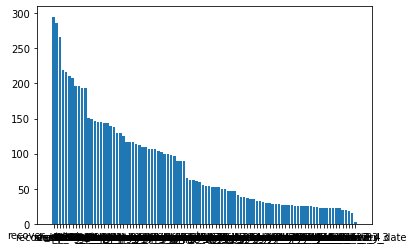

In [ ]:
data = sorted_subflows
names = list(data.keys())
values = list(data.values())

plt.bar(range(len(data)), values, tick_label=names)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


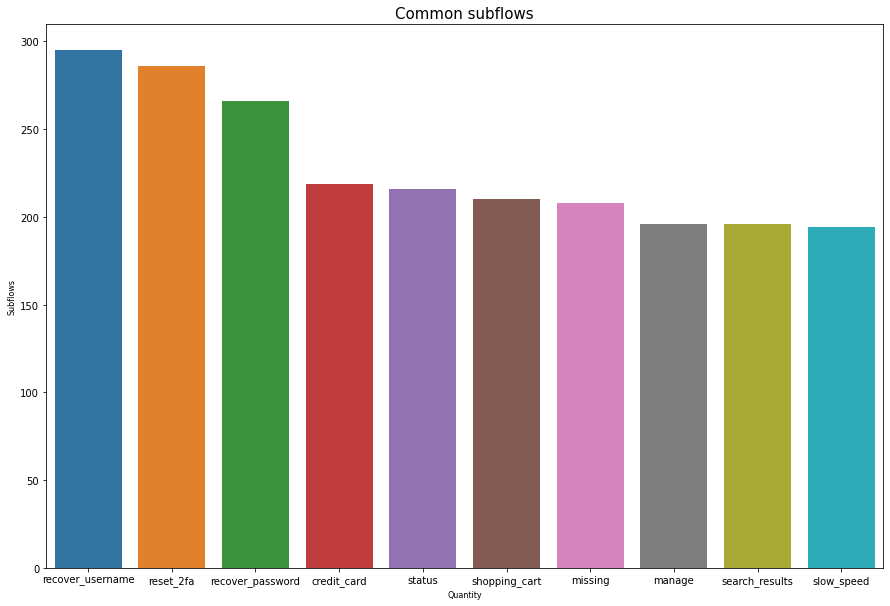

In [ ]:
# Import seaborn
import seaborn as sns
data_x = list(sorted_subflows.keys())[0:10]
data_y = list(sorted_subflows.values())[0:10]

plt.figure(figsize=(15,10))
sns.barplot(data_x, data_y)
plt.title('Common subflows',fontsize=15)
plt.ylabel('Subflows',fontsize=8)
plt.yticks(fontsize=10)
plt.xlabel('Quantity', fontsize=8)
plt.xticks(fontsize=10)
plt.show()


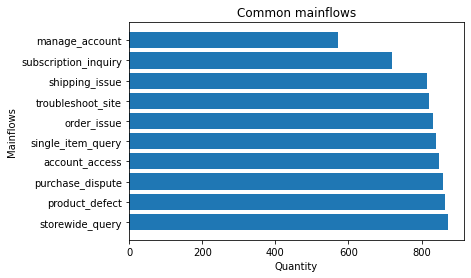

In [ ]:
data_x = list(sorted_mainflow.keys())[0:10]
data_y = list(sorted_mainflow.values())[0:10]

plt.barh(data_x, data_y)
plt.title('Common mainflows')
plt.ylabel('Mainflows')
plt.xlabel('Quantity')
plt.show()